<a href="https://colab.research.google.com/github/bgeervani/Iris_Unemploy_CarPrice_Sales/blob/main/codealpha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



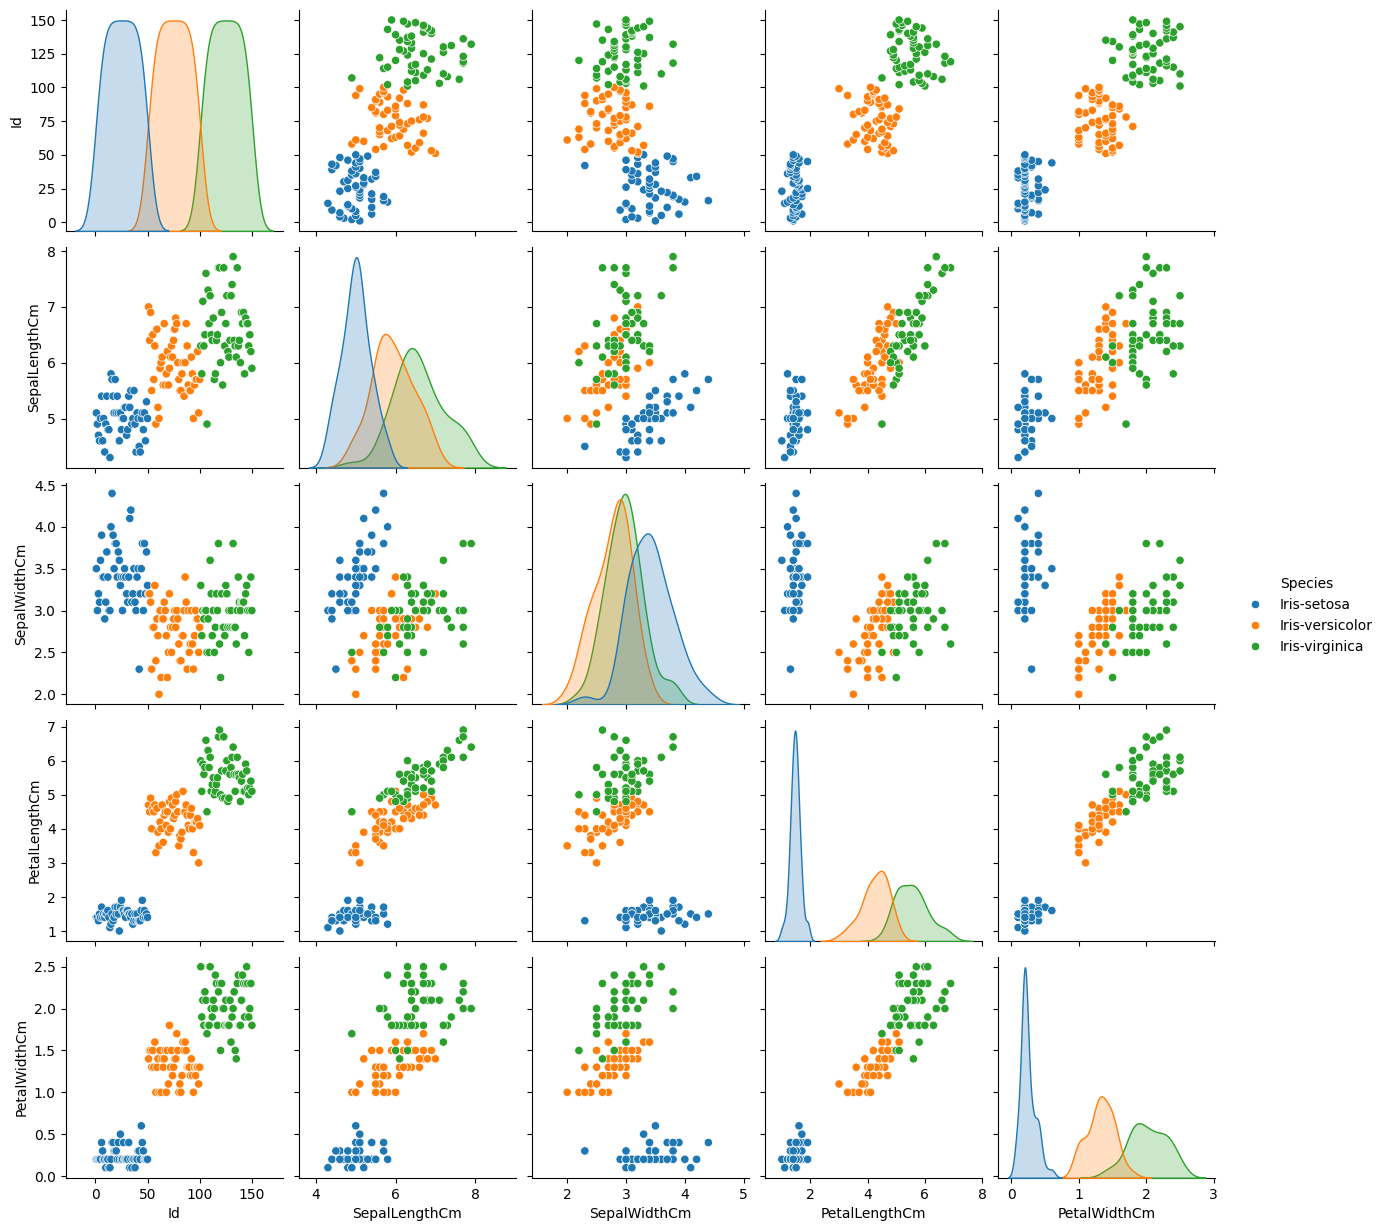

In [ ]:
# Task 1: Iris Flower Classification
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
url = "/content/drive/MyDrive/codealpha datasets/Iris.csv"
df = pd.read_csv(url)

# Encode target labels
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# Features & target
X = df.drop('Species', axis=1)
y = df['Species']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualization
sns.pairplot(pd.read_csv(url), hue="Species")
plt.show()


/tmp/ipython-input-1245674603.py:14: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


Dataset Head:
           Region       Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh 2020-01-31         M                             5.48   
1  Andhra Pradesh 2020-02-29         M                             5.83   
2  Andhra Pradesh 2020-03-31         M                             5.79   
3  Andhra Pradesh 2020-04-30         M                            20.51   
4  Andhra Pradesh 2020-05-31         M                            17.43   

   Estimated Employed  Estimated Labour Participation Rate (%) Region.1  \
0            16635535                                    41.02    South   
1            16545652                                    40.90    South   
2            15881197                                    39.18    South   
3            11336911                                    33.10    South   
4            12988845                                    36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129     79.74  
2    15.9

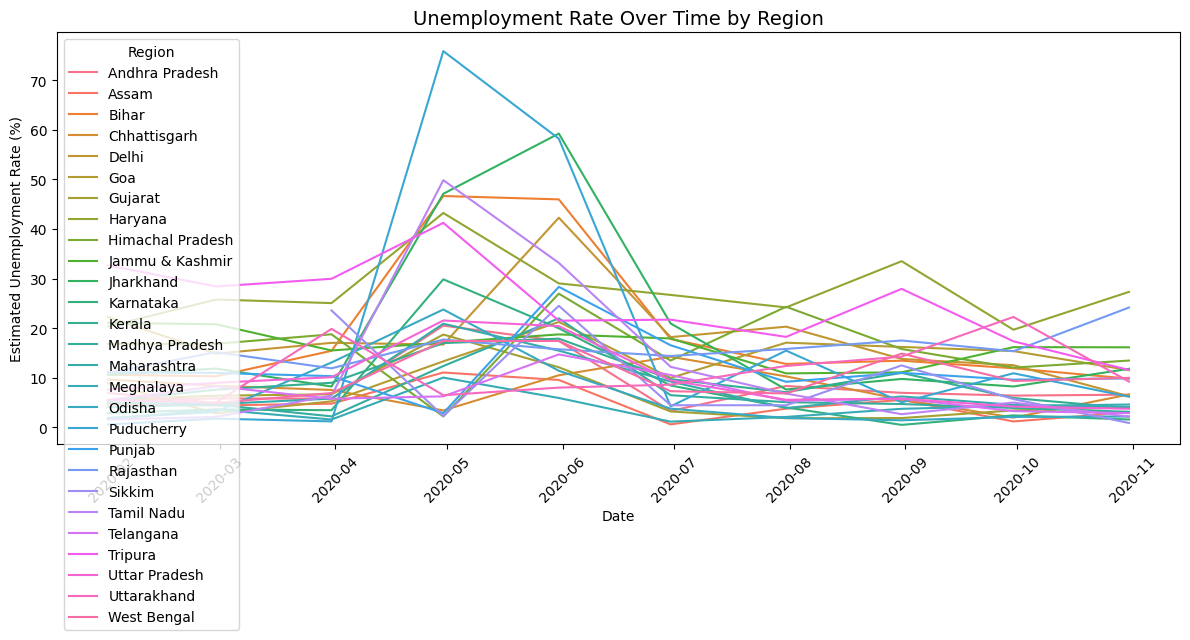

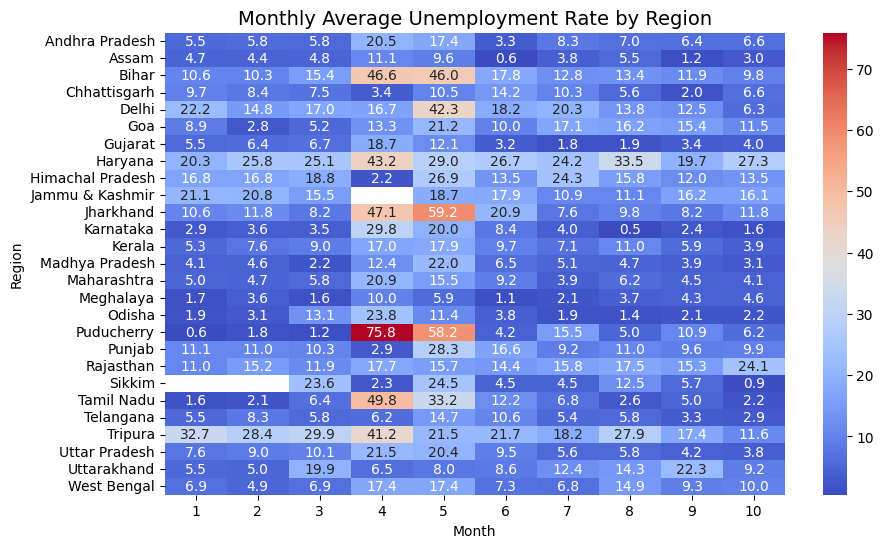

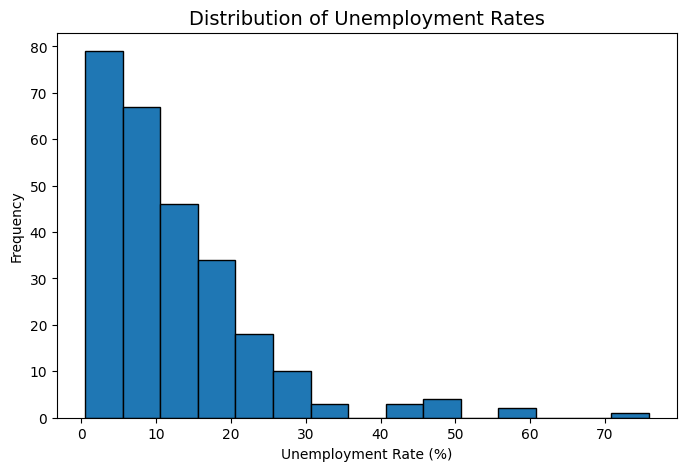

In [ ]:
# Task 2: Unemployment Analysis in India
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "/content/drive/MyDrive/codealpha datasets/archive (2).zip (Unzipped Files)/Unemployment_Rate_upto_11_2020.csv"
df = pd.read_csv(url)

# Rename columns for easier handling (remove extra spaces)
df.columns = [col.strip() for col in df.columns]

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Display dataset info
print("Dataset Head:")
print(df.head())
print("\nDataset Summary:")
print(df.describe())

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Line plot: Unemployment Rate over Time by Region
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', hue='Region')
plt.title("Unemployment Rate Over Time by Region", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap: Monthly Average Unemployment Rate by Region
df['Month'] = df['Date'].dt.month
pivot = df.pivot_table(values='Estimated Unemployment Rate (%)',
                       index='Region',
                       columns='Month',
                       aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt=".1f")
plt.title("Monthly Average Unemployment Rate by Region", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Region")
plt.show()

# Histogram of Unemployment Rates
plt.figure(figsize=(8, 5))
plt.hist(df['Estimated Unemployment Rate (%)'], bins=15, edgecolor='black')
plt.title("Distribution of Unemployment Rates", fontsize=14)
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Task 3: Car Price Prediction
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
url = "/content/drive/MyDrive/codealpha datasets/car data.csv"
df = pd.read_csv(url)

# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Features & target
X = df.drop('Present_Price', axis=1)
y = df['Present_Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 2.0923546667031045
R² Score: 0.7864786163015726


MSE: 3.1740973539761033
R² Score: 0.899438024100912


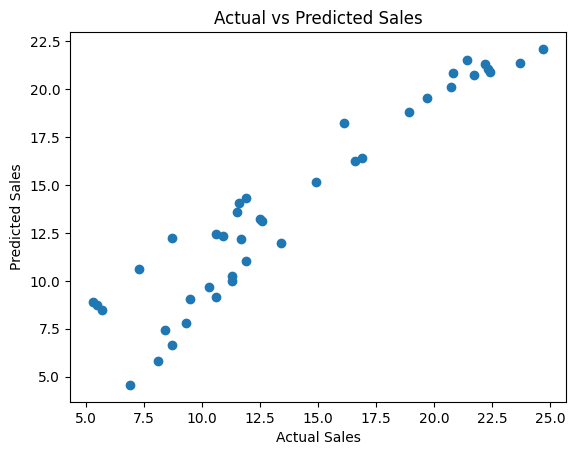

In [ ]:
# Task 4: Sales Prediction
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
url = "/content/drive/MyDrive/codealpha datasets/Advertising.csv"
df = pd.read_csv(url)

# Features & target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()
